In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten

import time

In [0]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

In [0]:

model = keras.Sequential()



model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=10, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

W0723 05:52:37.230757 140033099896704 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.8564 - acc: 0.7322
Epoch 2/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3601 - acc: 0.8978
Epoch 3/10
60000/60000 [========================

In [0]:
train_x = train_x.reshape((60000,28,28,1)) # ADDED
test_x = test_x.reshape((10000,28,28,1)) # ADDED


In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D # ADDED

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Conv2D(64, (3, 3), activation='relu')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Conv2D(64, (3, 3), activation='relu')) # ADDED
# model.add(Flatten(input_shape=(28,28)))
model.add(Flatten())

model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=10, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, BatchNormalization # ADDED

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization()) # ADDED
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Flatten())

model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


# model.fit(train_x, train_y, epochs=10, verbose=1, batch_size=128)
model.fit(train_x[:10000], train_y[:10000], epochs=10, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)         

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
9 truck


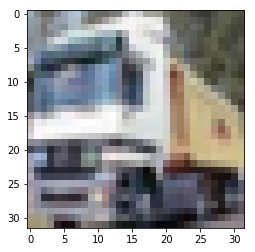

1 automobile


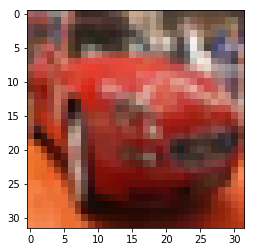

4 deer


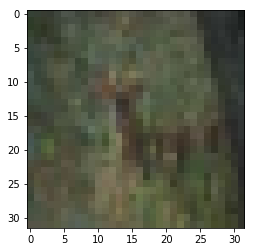

9 truck


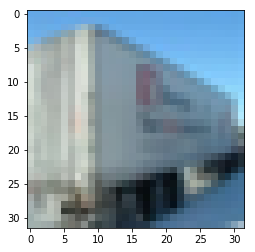

In [0]:
# (raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()


print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

for i in [1,5,10,15]:
  class_index = int(raw_train_y[i])
  print(class_index, labels[class_index])
  plt.imshow(raw_train_x[i])
  plt.show()
  
train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = keras.Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())

model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


# model.fit(train_x, train_y, epochs=10, verbose=1, batch_size=128)
model.fit(train_x[:10000], train_y[:10000], epochs=10, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

Cifar10 데이터 1만개와 랜덤하게 생성한 1만개.

진짜 데이터인지, 랜덤 데이터인지 구별한다.


HINT)

x = 기본 train_x 5만개에서 1만개 추린다.
y = 1만개의 1 어레이 생성
x에다가 1만개의 (32,32,3) 모양의 랜덤값을 추가.
y에다가 1만개의 0을 추가한다.

x,y에서 임의의 것 1만개를 뽑아서 train_x, train_y
나머지가 test_x, test_y

입력 사이즈는 32x32x3
출력 사이즈는 2









# Quiz

a = np.ones(10:3)

a의 [5:]을 전부 0으로 채우시오

```
1 1 1   # 1째줄
1 1 1   # 2째줄
1 1 1    # 3째줄
....
1 1 1     # 5째줄
1 1 1     # 6째줄
...
1 1 1    # 10째줄

1 1 1   # 1째줄
1 1 1   # 2째줄
1 1 1    # 3째줄
....
1 1 1     # 5째줄
0 0 0     # 6째줄
...
0 0 0    # 10째줄
```


In [0]:
a = np.ones((10,3))
print(a)

a[5:,] = 0
print(a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


# Quiz

a = np.ones((10,3))

(5,3) 사이즈의 랜덤한 값이 있는 b를 생성

a[5:] 를 b의 값으로 설정

<br>

a = np.ones((10,3))

a의 [5:]을 전부 random한 값으로 채우시오.

In [0]:
a = np.ones((10,3))
b = np.random.rand(5,3)
print(b)
a[5:] = b
print(a)

[[0.24636324 0.00253155 0.78049448]
 [0.83422174 0.42922968 0.32781212]
 [0.75197958 0.337961   0.63922061]
 [0.10908851 0.25692579 0.67621361]
 [0.22700143 0.39319909 0.95774487]]
[[1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [0.24636324 0.00253155 0.78049448]
 [0.83422174 0.42922968 0.32781212]
 [0.75197958 0.337961   0.63922061]
 [0.10908851 0.25692579 0.67621361]
 [0.22700143 0.39319909 0.95774487]]


# Quiz

a = np.ones((10,3,3,2))

a의 [5:]을 전부 random한 값으로 채우시오.

In [0]:
a = np.ones((10,3,3,2))
b = np.random.rand(5,3,3,2)
a[5:] = b
print(a[4])
print(a[5])


[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]
[[[0.36846778 0.36223628]
  [0.19307139 0.51882105]
  [0.44771242 0.83720245]]

 [[0.64374457 0.14239245]
  [0.54637209 0.33807349]
  [0.00922192 0.51817823]]

 [[0.32477197 0.41528386]
  [0.02176642 0.84079146]
  [0.86974116 0.24100274]]]


# Quiz
```
a = [0,1,2,3,4,5]
b = [0,2,4,6,8,10]
```

a와 b를 동시에 섞는다.
```
[3 5  1  0 4 2]
[6 10 2 0 8 4]
```
```
index = [3 1 2 ]
a[index] ---> [a[3], a[1], a[2]] --> [2 0 3]
b[index] ---> [b[3], b[1], b[2]] --> [4 0 6]
```







In [0]:
a = np.arange(6)
b = np.arange(6)*2

i = np.arange(6)
np.random.shuffle(i)

a = a[i]
b = b[i]
print(a)
print(b)

[1 0 3 4 2 5]
[ 2  0  6  8  4 10]
